In [1]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
#from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt 
from PIL import Image 
import seaborn as sns
import pandas as pd 
import numpy as np 
import os 


def _load_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img 

def _get_predictions(_model):
    f, ax = plt.subplots(1, 4)
    f.set_size_inches(80, 40)
    for i in range(4):
        ax[i].imshow(Image.open(imgs[i]).resize((200, 200), Image.ANTIALIAS))
    plt.show()
    
    f, axes = plt.subplots(1, 4)
    f.set_size_inches(80, 20)
    for i,img_path in enumerate(imgs):
        img = _load_image(img_path)
        preds  = decode_predictions(_model.predict(img), top=3)[0]
        b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color="gray", ax=axes[i])
        b.tick_params(labelsize=55)
        f.tight_layout()

In [2]:
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model

_input = Input((224,224,1)) 

conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(1000, activation="softmax")(dense2)

vgg16_model  = Model(inputs=_input, outputs=output)

In [3]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/root/.kaggle/kaggle.json"  # NOTE: This is different from the Medium post!
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)
#!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

Download 100%.


In [4]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 99% 807M/814M [00:11<00:00, 95.8MB/s]
100% 814M/814M [00:11<00:00, 75.3MB/s]


In [5]:
!kaggle datasets download -d slothkong/10-monkey-species

 98% 536M/547M [00:05<00:00, 95.6MB/s]
100% 547M/547M [00:05<00:00, 103MB/s] 


In [6]:
!kaggle datasets download -d keras/xception

 92% 142M/155M [00:01<00:00, 95.7MB/s]
100% 155M/155M [00:01<00:00, 92.4MB/s]


In [7]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!kaggle datasets download -d alxmamaev/flowers-recognition
!kaggle datasets download -d rajmehra03/trans-learn-weights
!kaggle datasets download -d keras/vgg16

100% 2.29G/2.29G [00:21<00:00, 185MB/s]
100% 2.29G/2.29G [00:21<00:00, 115MB/s]
 97% 219M/225M [00:03<00:00, 65.6MB/s]
100% 225M/225M [00:03<00:00, 63.5MB/s]
 79% 41.0M/52.2M [00:00<00:00, 54.0MB/s]
100% 52.2M/52.2M [00:00<00:00, 67.7MB/s]
 99% 536M/542M [00:07<00:00, 82.1MB/s]
100% 542M/542M [00:07<00:00, 74.1MB/s]


In [8]:
!kaggle datasets download -d keras/vgg19

 99% 575M/580M [00:05<00:00, 114MB/s]
100% 580M/580M [00:05<00:00, 116MB/s]


In [9]:
!kaggle datasets download -d moltean/fruits

100% 1.28G/1.28G [00:12<00:00, 65.0MB/s]
100% 1.28G/1.28G [00:12<00:00, 109MB/s] 


In [10]:
!kaggle datasets download -d keras/resnet50
!kaggle datasets download -d keras/inceptionv3

 92% 161M/174M [00:02<00:00, 76.0MB/s]
100% 174M/174M [00:02<00:00, 78.1MB/s]
 98% 159M/162M [00:01<00:00, 116MB/s] 
100% 162M/162M [00:01<00:00, 104MB/s]


In [11]:
!unzip /content/inceptionv3.zip -d /content/inceptionv3
!unzip /content/resnet50.zip -d /content/resnet50

Archive:  /content/inceptionv3.zip
  inflating: /content/inceptionv3/imagenet_class_index.json  
  inflating: /content/inceptionv3/inception_v3_weights_tf_dim_ordering_tf_kernels.h5  
  inflating: /content/inceptionv3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5  
Archive:  /content/resnet50.zip
  inflating: /content/resnet50/imagenet_class_index.json  
  inflating: /content/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5  
  inflating: /content/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5  


In [12]:
!unzip /content/vgg19.zip -d /content/vgg19

Archive:  /content/vgg19.zip
  inflating: /content/vgg19/imagenet_class_index.json  
  inflating: /content/vgg19/vgg19_weights_tf_dim_ordering_tf_kernels.h5  
  inflating: /content/vgg19/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5  


In [13]:
!unzip /content/xception.zip -d /content/xception 

Archive:  /content/xception.zip
  inflating: /content/xception/imagenet_class_index.json  
  inflating: /content/xception/xception_weights_tf_dim_ordering_tf_kernels.h5  
  inflating: /content/xception/xception_weights_tf_dim_ordering_tf_kernels_notop.h5  


In [14]:
!unzip /content/fruits.zip -d /content/fruits

Streaming output truncated to the last 5000 lines.
  inflating: /content/fruits/fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: /content/fruits/fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: /content/fruits/fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: /content/fruits/fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: /content/fruits/fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: /content/fruits/fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: /content/fruits/fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: /content/fruits/fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: /content/fruits/fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: /content/fruits/fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: /content/fruits/fruits-360

In [15]:
!unzip /content/chest-xray-pneumonia.zip -d /content/chest-xray-pneumoniaflowers-recognition
!unzip /content/flowers-recognition.zip -d /content/flowers-recognition
!unzip /content/trans-learn-weights.zip -d /content/trans-learn-weights
!unzip /content/vgg16.zip -d /content/vgg16

Streaming output truncated to the last 5000 lines.
  inflating: /content/chest-xray-pneumoniaflowers-recognition/chest_xray/train/PNEUMONIA/person636_virus_1217.jpeg  
  inflating: /content/chest-xray-pneumoniaflowers-recognition/chest_xray/train/PNEUMONIA/person637_bacteria_2528.jpeg  
  inflating: /content/chest-xray-pneumoniaflowers-recognition/chest_xray/train/PNEUMONIA/person637_bacteria_2529.jpeg  
  inflating: /content/chest-xray-pneumoniaflowers-recognition/chest_xray/train/PNEUMONIA/person637_virus_1218.jpeg  
  inflating: /content/chest-xray-pneumoniaflowers-recognition/chest_xray/train/PNEUMONIA/person639_virus_1220.jpeg  
  inflating: /content/chest-xray-pneumoniaflowers-recognition/chest_xray/train/PNEUMONIA/person63_bacteria_306.jpeg  
  inflating: /content/chest-xray-pneumoniaflowers-recognition/chest_xray/train/PNEUMONIA/person640_bacteria_2532.jpeg  
  inflating: /content/chest-xray-pneumoniaflowers-recognition/chest_xray/train/PNEUMONIA/person640_virus_1221.jpeg  
  i

In [16]:

img1 = "/content/dogs-vs-cats-redux-kernels-edition/train/cat.11679.jpg"
img2 = "/content/dogs-vs-cats-redux-kernels-edition/train/dog.2811.jpg"
img3 = "/content/flowers-recognition/flowers/flowers/sunflower/7791014076_07a897cb85_n.jpg"
img4 = "/content/fruits/fruits-360_dataset/fruits-360/Training/Banana/254_100.jpg"
imgs = [img1, img2, img3, img4]

In [17]:
imgs

['/content/dogs-vs-cats-redux-kernels-edition/train/cat.11679.jpg',
 '/content/dogs-vs-cats-redux-kernels-edition/train/dog.2811.jpg',
 '/content/flowers-recognition/flowers/flowers/sunflower/7791014076_07a897cb85_n.jpg',
 '/content/fruits/fruits-360_dataset/fruits-360/Training/Banana/254_100.jpg']

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
!unzip /content/dogs-vs-cats-redux-kernels-edition.zip -d /content/dogs-vs-cats-redux-kernels-edition
!unzip /content/dogs-vs-cats-redux-kernels-edition/test.zip -d /content/dogs-vs-cats-redux-kernels-edition
!unzip /content/dogs-vs-cats-redux-kernels-edition/train -d /content/dogs-vs-cats-redux-kernels-edition

Streaming output truncated to the last 5000 lines.
  inflating: /content/dogs-vs-cats-redux-kernels-edition/train/dog.5499.jpg  
  inflating: /content/dogs-vs-cats-redux-kernels-edition/train/dog.55.jpg  
  inflating: /content/dogs-vs-cats-redux-kernels-edition/train/dog.550.jpg  
  inflating: /content/dogs-vs-cats-redux-kernels-edition/train/dog.5500.jpg  
  inflating: /content/dogs-vs-cats-redux-kernels-edition/train/dog.5501.jpg  
  inflating: /content/dogs-vs-cats-redux-kernels-edition/train/dog.5502.jpg  
  inflating: /content/dogs-vs-cats-redux-kernels-edition/train/dog.5503.jpg  
  inflating: /content/dogs-vs-cats-redux-kernels-edition/train/dog.5504.jpg  
  inflating: /content/dogs-vs-cats-redux-kernels-edition/train/dog.5505.jpg  
  inflating: /content/dogs-vs-cats-redux-kernels-edition/train/dog.5506.jpg  
  inflating: /content/dogs-vs-cats-redux-kernels-edition/train/dog.5507.jpg  
  inflating: /content/dogs-vs-cats-redux-kernels-edition/train/dog.5508.jpg  
  inflating: /co

In [20]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
#from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt 
from PIL import Image 
import seaborn as sns
import pandas as pd 
import numpy as np 
import os 

img1 = "/content/dogs-vs-cats-redux-kernels-edition/train/cat.11679.jpg"
img2 = "/content/dogs-vs-cats-redux-kernels-edition/train/dog.2811.jpg"
img3 = "/content/flowers-recognition/flowers/sunflower/1022552036_67d33d5bd8_n.jpg"
img4 = "/content/fruits/fruits-360_dataset/fruits-360/Training/Banana/254_100.jpg"
imgs = [img1, img2, img3, img4]

def _load_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img 

def _get_predictions(_model):
    f, ax = plt.subplots(1, 4)
    f.set_size_inches(80, 40)
    for i in range(4):
        ax[i].imshow(Image.open(imgs[i]).resize((200, 200), Image.ANTIALIAS))
    plt.show()
    
    f, axes = plt.subplots(1, 4)
    f.set_size_inches(80, 20)
    for i,img_path in enumerate(imgs):
        img = _load_image(img_path)
        preds  = decode_predictions(_model.predict(img), top=3)[0]
        b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color="gray", ax=axes[i])
        b.tick_params(labelsize=55)
        f.tight_layout()

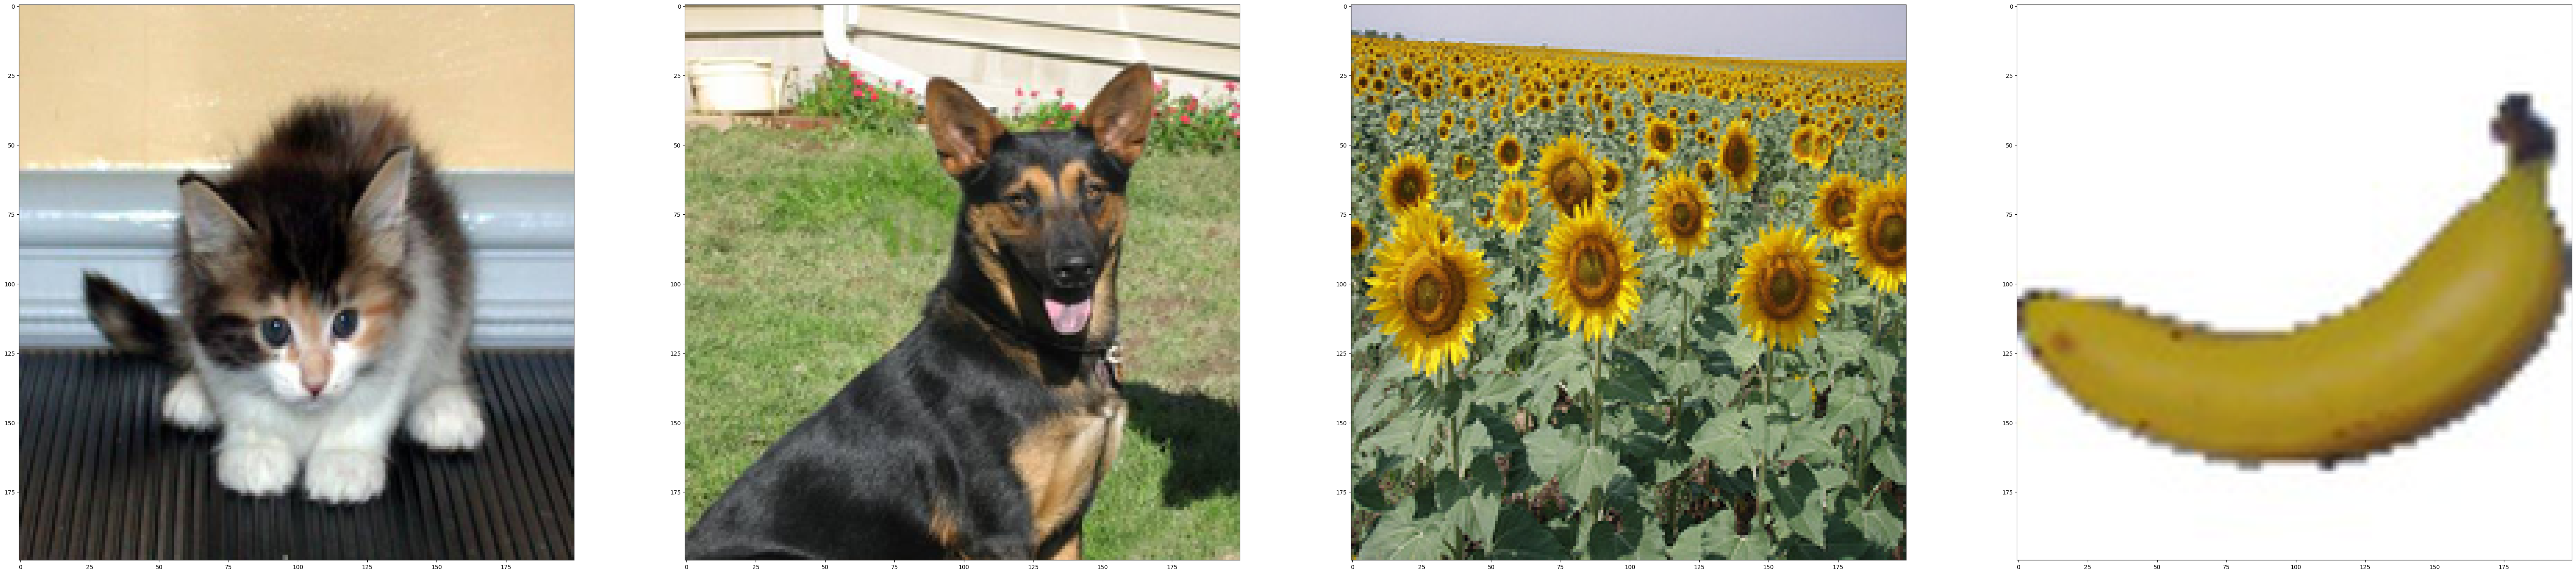

1/1 [==============================] - 1s 1s/step


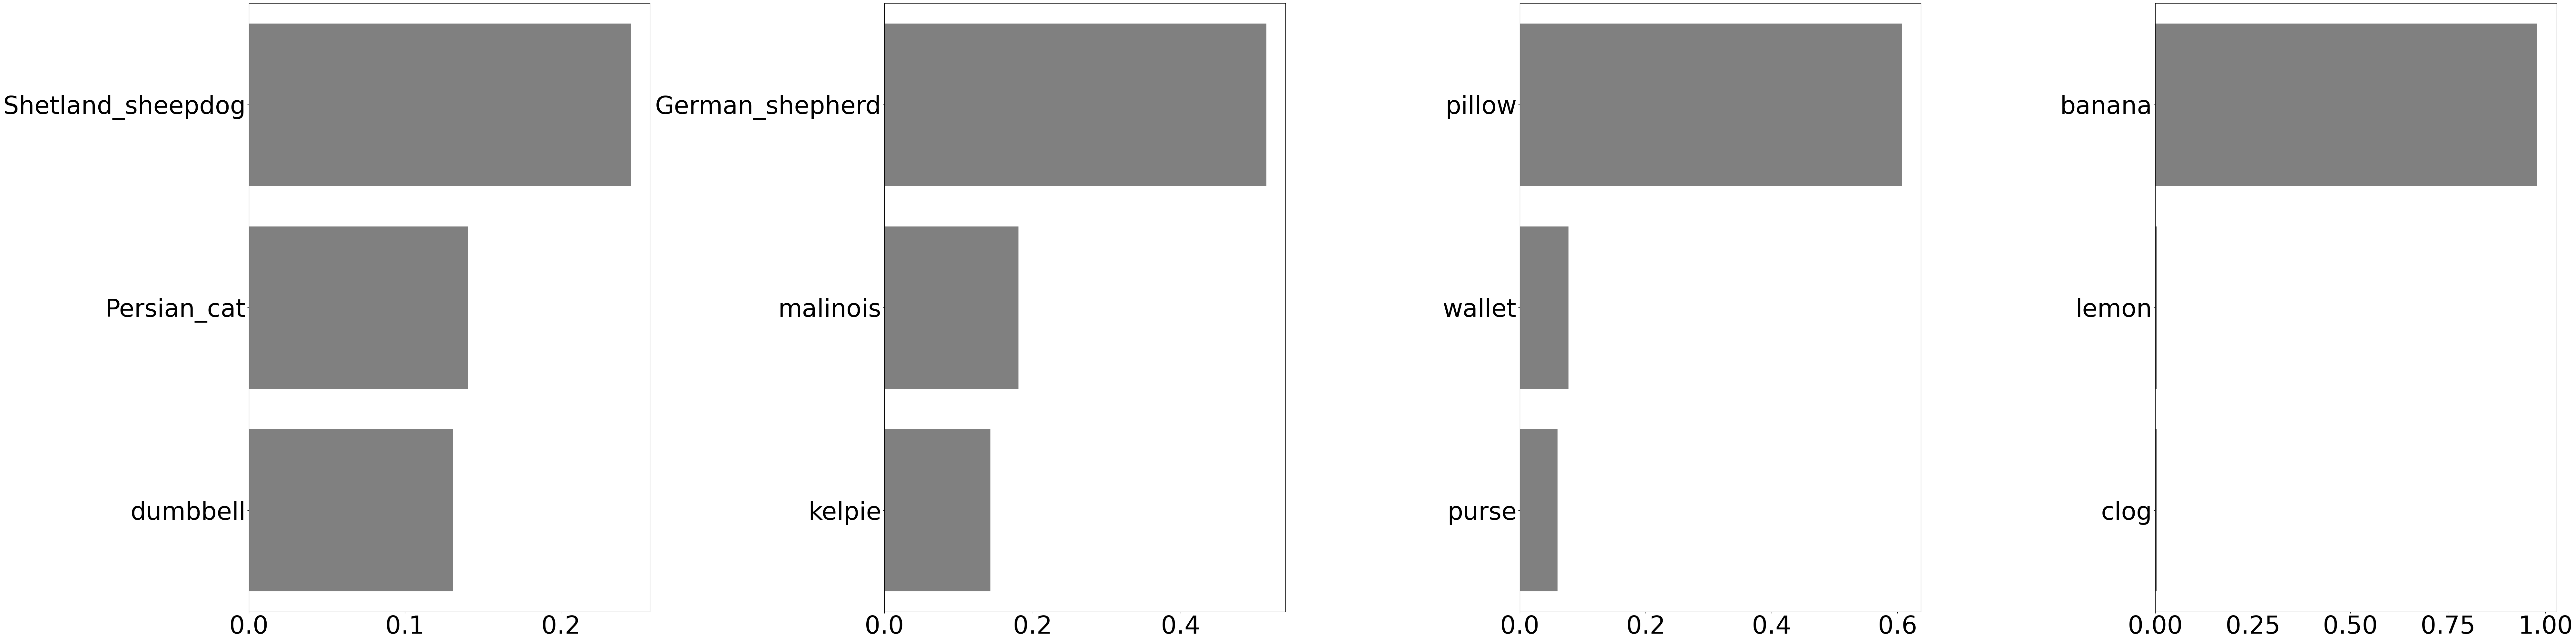

In [21]:

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
vgg16_weights = '/content/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
vgg16_model = VGG16(weights=vgg16_weights)
_get_predictions(vgg16_model)

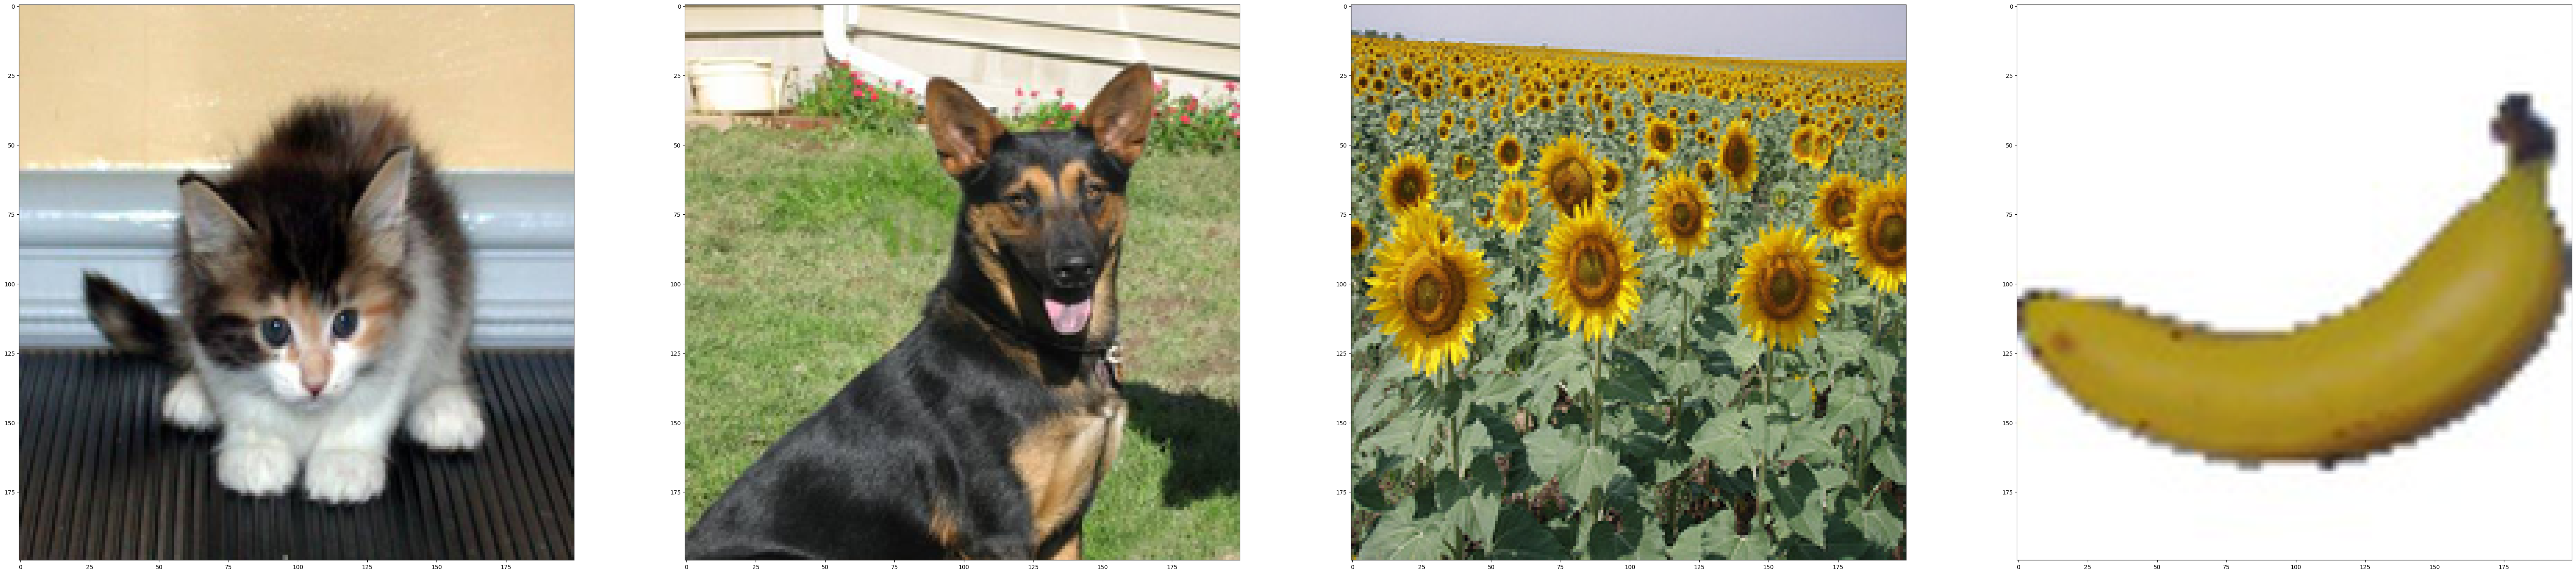

1/1 [==============================] - 1s 1s/step


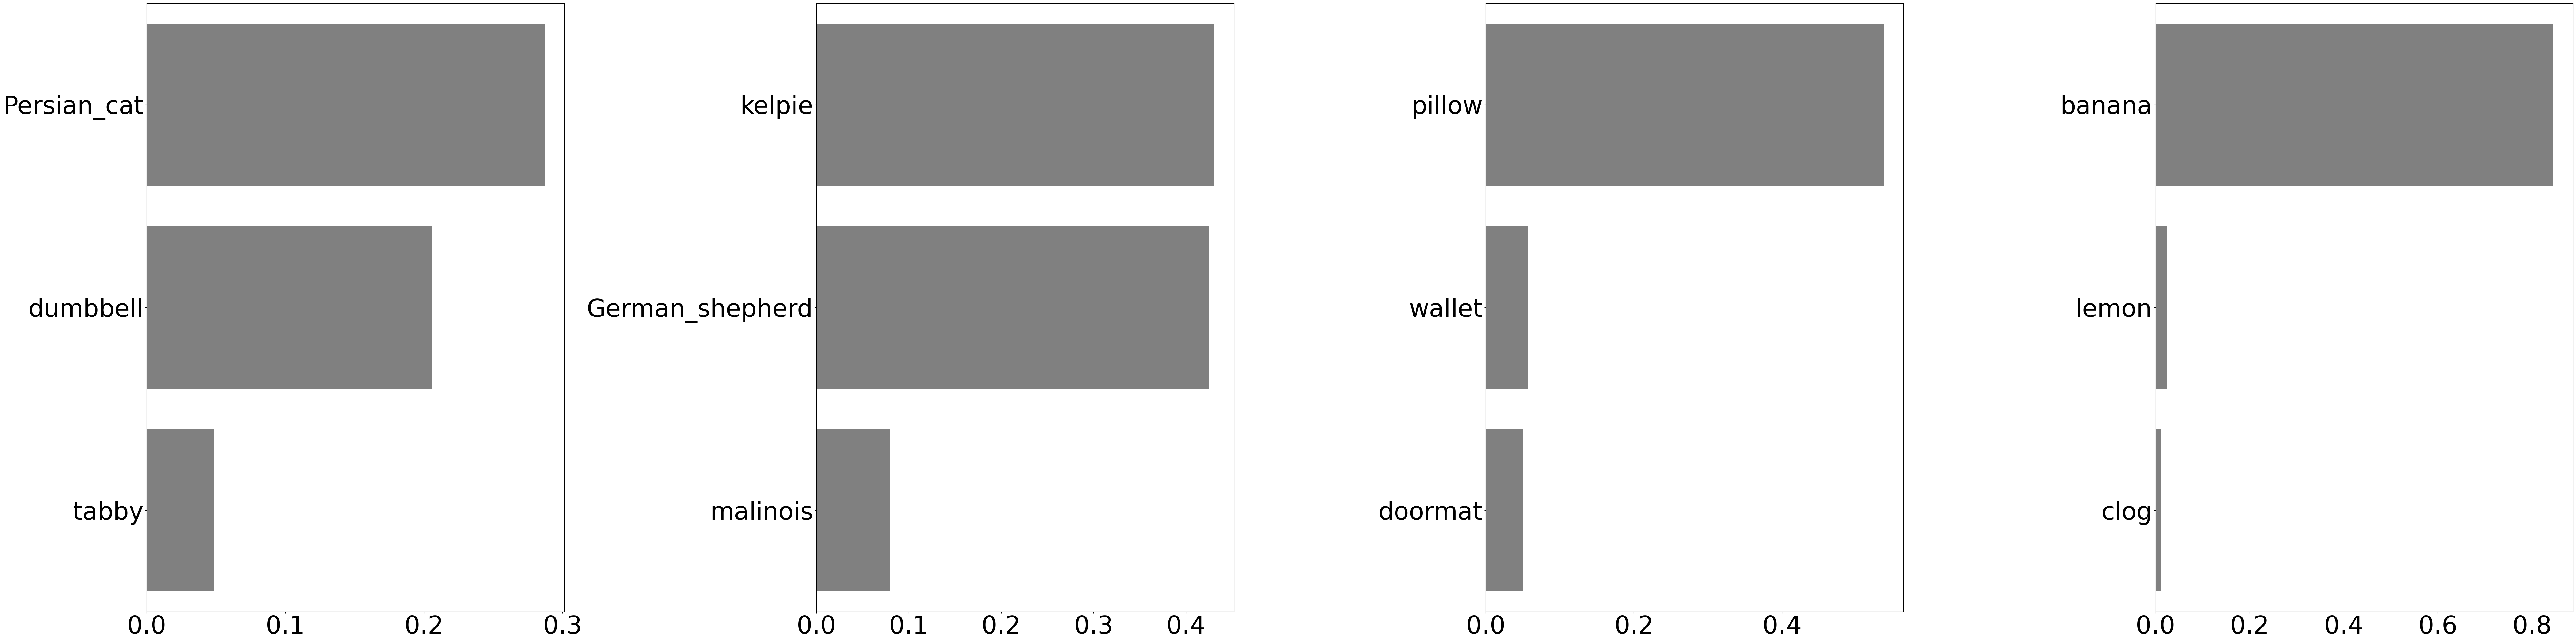

In [22]:

from keras.applications.vgg19 import VGG19
vgg19_weights = '/content/vgg19/vgg19_weights_tf_dim_ordering_tf_kernels.h5'
vgg19_model = VGG19(weights=vgg19_weights)
_get_predictions(vgg19_model)

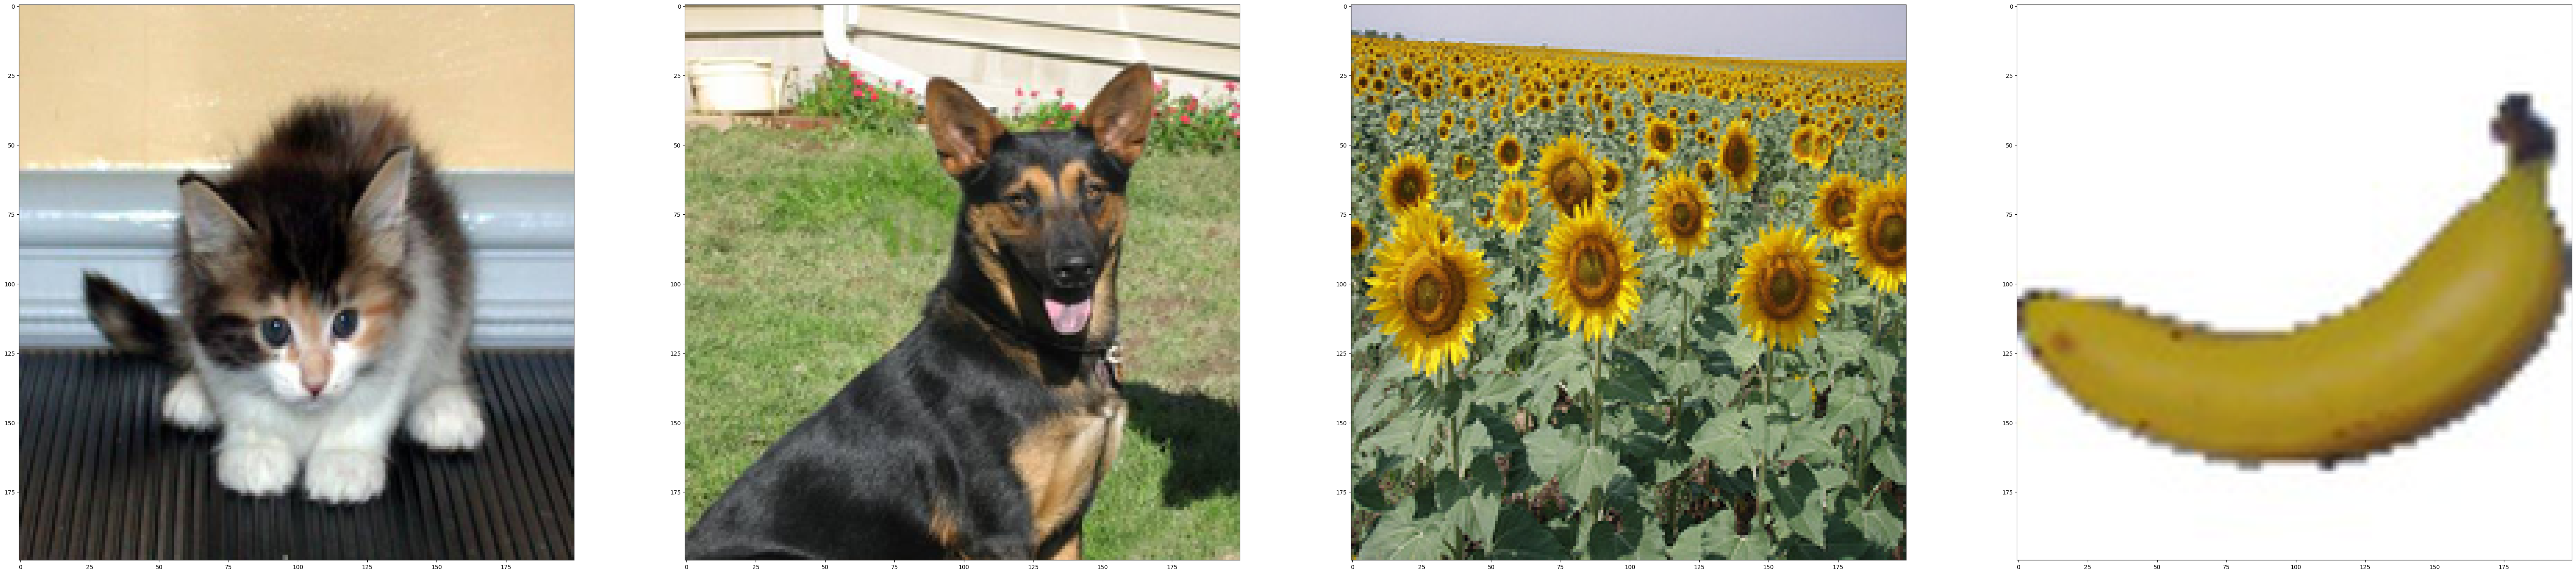

ValueError: ignored

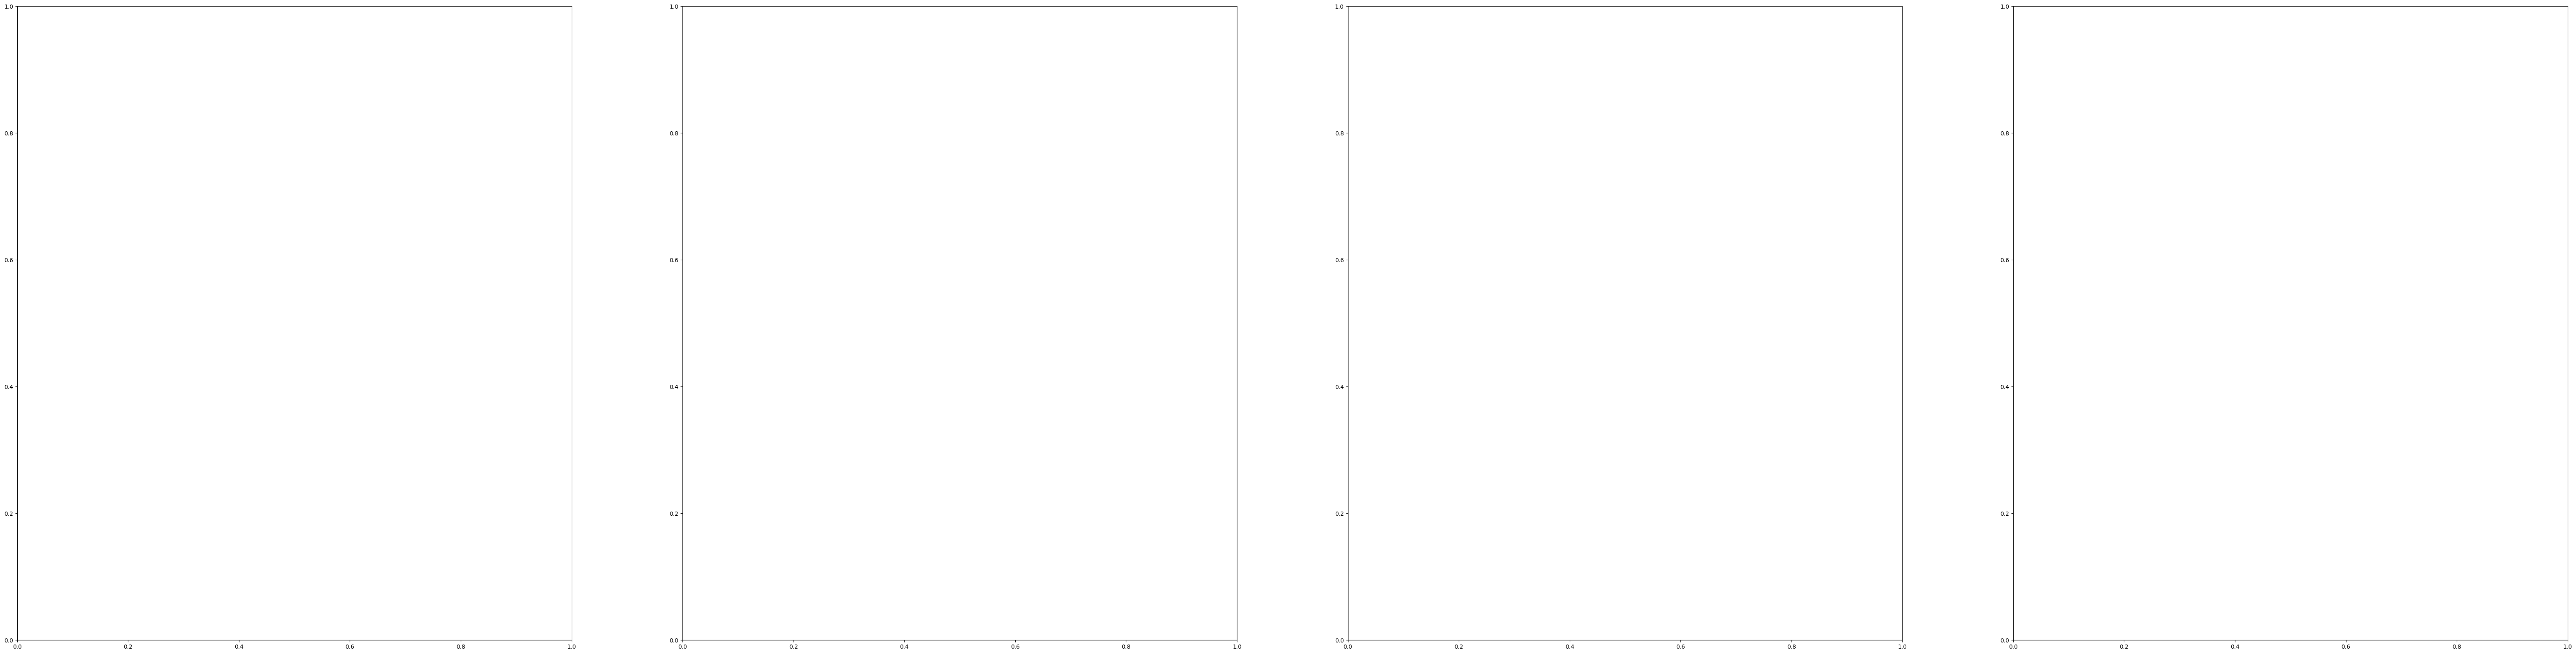

In [23]:
from keras.applications.inception_v3 import InceptionV3
inception_weights = '/content/inceptionv3/inception_v3_weights_tf_dim_ordering_tf_kernels.h5'
inception_model = InceptionV3(weights=inception_weights)
_get_predictions(inception_model)

In [ ]:
#!pip install keras.applications
#from keras.applications.resnet50 import ResNet50
#from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50


#from keras_applications.resnet import ResNet50
#from tensorflow.keras.applications.resnet50 import ResNet50
resnet_weights = '/content/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5'
#model.load_weights(weights, by_name=True, skip_mismatch=True)
#include_top=False, 
resnet_model = ResNet50(resnet_weights)
#resnet_model=resnet_model.load_weights(resnet_weights, by_name=True, skip_mismatch=True)
_get_predictions(resnet_model)

In [ ]:
resnet_weights

In [ ]:
from keras.applications.xception import Xception
xception_weights = '/content/xception/xception_weights_tf_dim_ordering_tf_kernels.h5'
xception_model = Xception(weights=xception_weights)

In [ ]:
resnet50 = ResNet50(weights='imagenet', include_top=False)

In [ ]:
def _get_features(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img_data = img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    resnet_features = resnet50.predict(img_data)
    return resnet_features

img_path = "/content/dogs-vs-cats-redux-kernels-edition/train/dog.2811.jpg"
resnet_features = _get_features(img_path)

In [ ]:
features_representation_1 = resnet_features.flatten()
features_representation_2 = resnet_features.squeeze()

print ("Shape 1: ", features_representation_1.shape)
print ("Shape 2: ", features_representation_2.shape)

In [ ]:
basepath = "/content/fruits/fruits-360_dataset/fruits-360/Training/"
class1 = os.listdir(basepath + "Banana/")
class2 = os.listdir(basepath + "Strawberry/")

data = {'banana': class1[:10], 
        'strawberry': class2[:10], 
        'test': [class1[11], class2[11]]}

In [ ]:
basepath = "/content/fruits/fruits-360_dataset/fruits-360/Training/"
class1 = os.listdir(basepath + "Banana/")
class2 = os.listdir(basepath + "Strawberry/")
class3 = os.listdir(basepath + "Avocado/")
class4 = os.listdir(basepath + "Blueberry/")

data_new = {'banana': class1[:10], 
        'strawberry': class2[:10], 
        'Avacado': class3[:30], 
        'Blueberry': class4[:10], 
        'test': [class1[11], class2[11],class3[11],class4[11]]}

In [ ]:
features = {"banana" : [], "strawberry" : [],"Avocado":[],"Blueberry":[], "test" : []}
testimgs = []
for label, val in data_new.items():
    for k, each in enumerate(val):        
        if label == "test" and k == 0:
            img_path = basepath + "/Banana/" + each
            testimgs.append(img_path)
        elif label == "test" and k == 1:
            img_path = basepath + "/Strawberry/" + each
            testimgs.append(img_path)
        elif label == "test" and k == 1:
            img_path = basepath + "/Avocado/" + each
            testimgs.append(img_path)
        elif label == "test" and k == 1:
            img_path = basepath + "/Blueberry/" + each
            testimgs.append(img_path)
        else: 
            img_path = basepath + label.title() + "/" + each
        try:
          feats = _get_features(img_path)
          features[label].append(feats.flatten())     
        except:
          pass

In [ ]:
dataset = pd.DataFrame()
for label, feats in features.items():
    temp_df = pd.DataFrame(feats)
    temp_df['label'] = label
    dataset = dataset.append(temp_df, ignore_index=True)
dataset.head()

In [ ]:
y = dataset[dataset.label != 'test'].label
X = dataset[dataset.label != 'test'].drop('label', axis=1)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

model = MLPClassifier(hidden_layer_sizes=(100, 10))
pipeline = Pipeline([('low_variance_filter', VarianceThreshold()), ('model', model)])
pipeline.fit(X, y)

print ("Model Trained on pre-trained features")

In [ ]:
y

In [ ]:
features

In [ ]:
feats = _get_features('/content/testing/Screen Shot 2023-04-06 at 8.52.42 PM.png')
features[label].append(feats.flatten())  
feats = _get_features('/content/testing/Screen Shot 2023-04-13 at 4.09.21 PM.png')
features[label].append(feats.flatten())  
feats = _get_features('/content/fruits/fruits-360_dataset/fruits-360/Test/Blueberry/125_100.jpg')
features[label].append(feats.flatten())  
feats = _get_features('/content/testing/Screen Shot 2023-04-06 at 8.51.41 PM.png')
features[label].append(feats.flatten())  
feats = _get_features('/content/testing/Screen Shot 2023-04-13 at 7.23.01 PM.png')
features[label].append(feats.flatten())  

In [ ]:
features[label][1][0]

In [ ]:
features['test']

In [ ]:
preds = pipeline.predict(features['test'])

In [ ]:
preds

In [ ]:
f, ax = plt.subplots(1, 4)
for i in range(2):
    ax[i].imshow(Image.open(testimgs[i]).resize((200, 200), Image.ANTIALIAS))
    ax[i].text(10, 180, 'Predicted: %s' % preds[i], color='k', backgroundcolor='red', alpha=0.8)
ax[i].imshow(Image.open('/content/testing/Screen Shot 2023-04-06 at 8.52.42 PM.png').resize((200, 200), Image.ANTIALIAS))
ax[i].text(10, 180, 'Predicted: %s' % preds[i+1], color='k', backgroundcolor='red', alpha=0.8)
ax[i].imshow(Image.open('/content/testing/Screen Shot 2023-04-13 at 4.09.21 PM.png').resize((200, 200), Image.ANTIALIAS))
ax[i].text(10, 180, 'Predicted: %s' % preds[i+1+1], color='k', backgroundcolor='red', alpha=0.8)
ax[i].imshow(Image.open('/content/fruits/fruits-360_dataset/fruits-360/Test/Blueberry/125_100.jpg').resize((200, 200), Image.ANTIALIAS))
ax[i].text(10, 180, 'Predicted: %s' % preds[i+1+1+1], color='k', backgroundcolor='red', alpha=0.8)
plt.show()

In [ ]:
f, ax = plt.subplots(1, 2)
ax[i].imshow(Image.open('/content/testing/Screen Shot 2023-04-06 at 8.52.42 PM.png').resize((200, 200), Image.ANTIALIAS))
ax[i].text(10, 180, 'Predicted: %s' % preds[2], color='k', backgroundcolor='red', alpha=0.8)
plt.show()

In [ ]:
f, ax = plt.subplots(1, 2)
ax[i].imshow(Image.open('/content/testing/Screen Shot 2023-04-13 at 7.23.01 PM.png').resize((200, 200), Image.ANTIALIAS))
ax[i].text(10, 180, 'Predicted: %s' % preds[-2], color='k', backgroundcolor='red', alpha=0.8)
plt.show()

In [ ]:
f, ax = plt.subplots(1, 2)
ax[i].imshow(Image.open('/content/testing/Screen Shot 2023-04-06 at 8.51.41 PM.png').resize((200, 200), Image.ANTIALIAS))
ax[i].text(10, 180, 'Predicted: %s' % preds[-1], color='k', backgroundcolor='red', alpha=0.8)
plt.show()

In [ ]:
preds

In [ ]:
testimgs

In [ ]:

preds = pipeline.predict(features['test'])

f, ax = plt.subplots(1, 2)
for i in range(2):
    ax[i].imshow(Image.open(testimgs[i]).resize((200, 200), Image.ANTIALIAS))
    ax[i].text(10, 180, 'Predicted: %s' % preds[i], color='k', backgroundcolor='red', alpha=0.8)
plt.show()

In [ ]:


!kaggle kernels output shivamb/cnn-architectures-vgg-resnet-inception-tl -p /content